|    | Unidad de Negocio          |         Ingresos |          Egresos |             Total |   Calculated Net Income |
|---:|:---------------------------|-----------------:|-----------------:|------------------:|------------------------:|
|  0 | Academia Musica            |  76275           |  85818           |   -9543           |         -9543           |
|  1 | Alquileres Varios          |      1.61009e+06 |      1.61009e+06 |       0           |             0           |
|  2 | Bambu/Hanei                |      2.34126e+06 |      2.2101e+06  |  131167           |        131167           |
|  3 | CONSULTORIOS               | 195838           | 156351           |   39487.4         |         39487.4         |
|  4 | Desarrolladora GR          |      1.78736e+08 |      1.04534e+08 |       7.42017e+07 |             7.42017e+07 |
|  5 | Expensas PLCA              |      2.34733e+06 |      2.24204e+06 |  105294           |        105294           |
|  6 | Expensas PLRE              |     

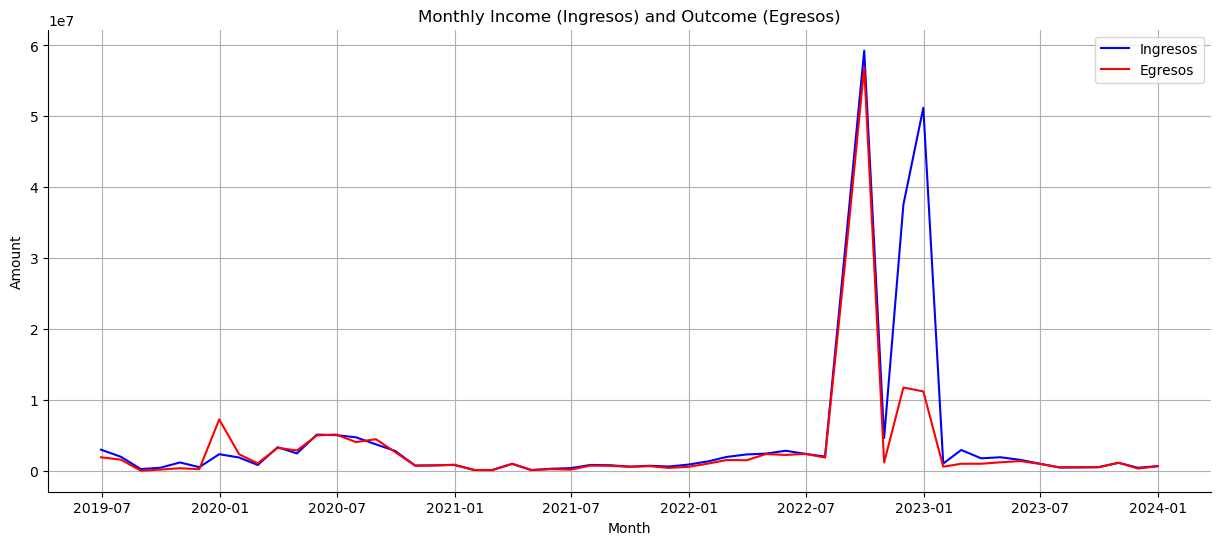

In [7]:
import pandas as pd

# Load the CSV file
file_path = 'business_unit_system_cash_flow.csv'
df = pd.read_csv(file_path)

# Aggregate financial performance for each business unit
aggregate_financial_performance = df.groupby('Unidad de Negocio').agg({
    'Ingresos': 'sum',
    'Egresos': 'sum',
    'Total': 'sum'
}).reset_index()

# Calculate Net Income as Income - Expenses just to confirm the 'Total' column matches this calculation (it should)
aggregate_financial_performance['Calculated Net Income'] = aggregate_financial_performance['Ingresos'] - aggregate_financial_performance['Egresos']
aggregate_financial_performance.sort_values(ascending=False, by=['Calculated Net Income'])
print(aggregate_financial_performance.to_markdown())



import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd
import locale

# Set the locale to Spanish to handle month names in Spanish
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Try converting 'Período' to datetime again
try:
    cash_flow_data['Período'] = pd.to_datetime(cash_flow_data['Período'], format='%B %Y', errors='coerce') + MonthEnd(1)
except ValueError:
    # In case of an error, reset the locale and inform the user
    locale.setlocale(locale.LC_TIME, 'C')
    raise

# Reset the locale back to default
locale.setlocale(locale.LC_TIME, 'C')

# Aggregate data by month again
monthly_data = cash_flow_data.groupby(cash_flow_data['Período']).agg({'Ingresos': 'sum', 'Egresos': 'sum'})

# Plotting the updated data
plt.figure(figsize=(15, 6))
plt.plot(monthly_data.index, monthly_data['Ingresos'], label='Ingresos', color='blue')
plt.plot(monthly_data.index, monthly_data['Egresos'], label='Egresos', color='red')
plt.title('Monthly Income (Ingresos) and Outcome (Egresos)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
sns.despine()

plt.show()